In [ ]:
# Importing all necessary libraries required for this coursework

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import zscore
from sklearn.metrics import accuracy_score

!pip install --upgrade spacy

# Reading the Dataset

In [ ]:
data = pd.read_csv('comp1804_dataset.csv')
data

,par_id,paragraph,has_entity,lexicon_count,difficult_words,last_editor_gender,category,text_clarity
0,428209002237,Ramsay was born in Glasgow on 2 October 1852. ...,ORG_YES_PRODUCT_NO_PERSON_YES_,49,12.0,man,biographies,clear_enough
1,564218010072,It has been widely estimated for at least the ...,ORG_YES_PRODUCT_NO_PERSON_NO_,166,47.0,man,artificial intelligence,not_clear_enough
2,291401001672,He went on to win the Royal Medal of the Royal...,ORG_YES_PRODUCT_NO_PERSON_NO_,69,18.0,non-binary,biographies,clear_enough
3,31548004883,The changes have altered many underlying assum...,ORG_NO_PRODUCT_YES_PERSON_NO_,76,27.0,non-binary,programming,clear_enough
4,50634005146,"After these novels were published, Disraeli de...",ORG_YES_PRODUCT_YES_PERSON_YES_,200,47.0,man,biographies,not_clear_enough
...,...,...,...,...,...,...,...,...
9342,200523007578,Sir Joseph Dalton Hooker was a British botani...,ORG_YES_PRODUCT_NO_PERSON_YES_,54,16.0,man,biographies,NaN
9343,50634005203,As successful invasions of India generally cam...,ORG_YES_PRODUCT_NO_PERSON_YES_,217,46.0,woman,biographies,NaN
9344,6437003939,Hawking was born on 8 January 1942 in Oxford t...,ORG_YES_PRODUCT_NO_PERSON_YES_,91,27.0,woman,biographies,NaN
9345,725259002815,More complex tasks can be making custom data e...,ORG_YES_PRODUCT_NO_PERSON_NO_,47,15.0,man,programming,NaN


# Statistics Summary

In [ ]:
data. describe()

,par_id,lexicon_count,difficult_words
count,9.347000e+03,9347.000000,9329.000000
mean,3.568369e+11,81.981277,21.514203
std,3.221399e+11,63.533532,16.307358
min,8.500328e+07,0.000000,0.000000
25%,7.019601e+10,33.000000,9.000000
50%,2.684380e+11,64.000000,17.000000
75%,6.124310e+11,117.000000,30.000000
max,1.058779e+12,653.000000,143.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9347 entries, 0 to 9346
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   par_id              9347 non-null   int64  
 1   paragraph           9347 non-null   object 
 2   has_entity          9347 non-null   object 
 3   lexicon_count       9347 non-null   int64  
 4   difficult_words     9329 non-null   float64
 5   last_editor_gender  9347 non-null   object 
 6   category            9286 non-null   object 
 7   text_clarity        9 non-null      object 
dtypes: float64(1), int64(2), object(5)
memory usage: 584.3+ KB


In [ ]:
data.shape

(9347, 8)

In [ ]:
data.ndim

2

# Handling and Imputing msising values

In [ ]:
## Checking for missing values in the  dataset
data.isnull().sum()

par_id                   0
paragraph                0
has_entity               0
lexicon_count            0
difficult_words         18
last_editor_gender       0
category                61
text_clarity          9338
dtype: int64

In [ ]:
data.dropna(subset=['difficult_words'], inplace=True)

In [ ]:
data.isnull().sum()

par_id                   0
paragraph                0
has_entity               0
lexicon_count            0
difficult_words          0
last_editor_gender       0
category                61
text_clarity          9320
dtype: int64

# Checking and dropping duplicates

In [ ]:
# Printing data after removing duplicate rows in the input parameter - 'paragraph'
data['paragraph']=data['paragraph'].str.lower()
clean_data = data.drop_duplicates(subset=['paragraph'])
print("Cleaned Dataset:")
print(clean_data.shape)

Cleaned Dataset:
(8974, 8)


In [ ]:
# Printing data after duplicate rows in the input parameter - 'has_entity'
data['has_entity']=data['has_entity'].str.lower()
clean_data = data.drop_duplicates(subset=['has_entity'])
print("Cleaned Dataset:")
print(clean_data.shape)

Cleaned Dataset:
(9, 8)


# Distribution of Labels

In [ ]:
print("Distribution of 'text_clarity' labels:")
print(data['text_clarity'].value_counts())

Distribution of 'text_clarity' labels:
clear_enough        5
not_clear_enough    4
Name: text_clarity, dtype: int64


In [ ]:
print("Distribution of 'Caregory' labels:")
print(data['category'].value_counts())

Distribution of 'Caregory' labels:
biographies                             2937
philosophy                              2580
programming                             1977
artificial intelligence                 1560
movies about artificial intelligence     166
Philosophy                                13
Biographies                               13
Artificial intelligence                   11
Programming                               10
Movies about artificial intelligence       1
Name: category, dtype: int64


# Exploratory Data Analysis

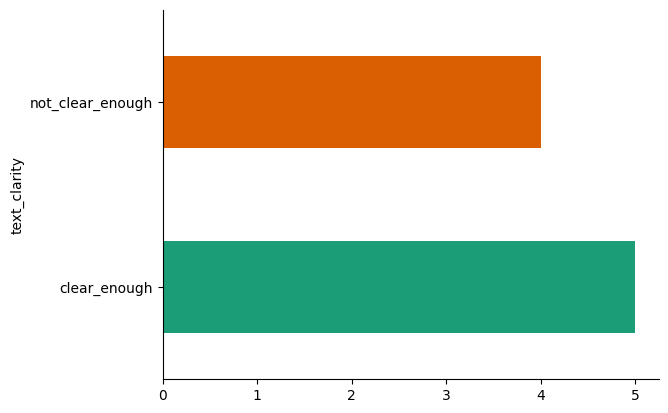

In [ ]:
# Scatter plot of 'text_clarity' parameter

data.groupby('text_clarity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
tl = data['paragraph'].apply(len)
print("\nText Length Analysis:")
print(tl.value_counts())
#print(df[['text_clarity', 'text_length']].groupby('text_clarity').describe())
d=pd.Series(tl)
print(d)


Text Length Analysis:
2       42
110     31
111     31
112     30
117     29
        ..
1472     1
1781     1
1150     1
1295     1
1275     1
Name: paragraph, Length: 1473, dtype: int64
0        284
1       1039
2        425
3        514
4       1235
        ... 
9342     334
9343    1319
9344     616
9345     275
9346     492
Name: paragraph, Length: 9329, dtype: int64


<Axes: title={'center': 'Distribution of  Variable'}, ylabel='Count'>

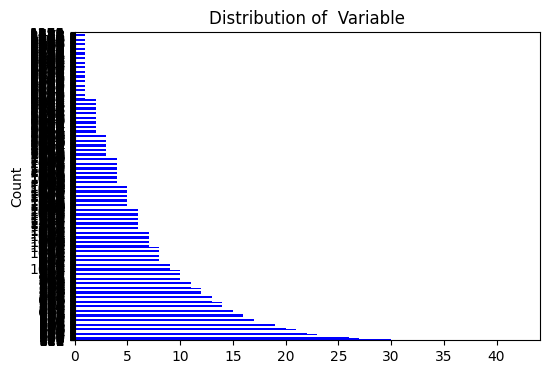

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Distribution of  Variable')
plt.xlabel('Category')
plt.ylabel('Count')
d.value_counts().plot(kind='barh', color='blue')

# Reading and Splitting data

In [ ]:
# Selecting the features and target variable
X = data[['paragraph','has_entity']]
Y = data[['text_clarity']]

In [ ]:
print(X.isna().sum())
print(Y.isna().sum())
print(Y.value_counts())

paragraph     0
has_entity    0
dtype: int64
text_clarity    9320
dtype: int64
text_clarity    
clear_enough        5
not_clear_enough    4
dtype: int64


In [ ]:
# Instantiate the SimpleImputer with a strategy (e.g., most_frequent)
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the selected columns
X_impute = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
#Y_impute = pd.DataFrame(imputer.fit_transform(Y), columns=X.columns)
# Display the DataFrame with imputed values
print(X_impute)
#print(Y_impute)

                                              paragraph  \
0     ramsay was born in glasgow on 2 october 1852. ...   
1     it has been widely estimated for at least the ...   
2     he went on to win the royal medal of the royal...   
3     the changes have altered many underlying assum...   
4     after these novels were published, disraeli de...   
...                                                 ...   
9324  sir joseph dalton hooker  was a british botani...   
9325  as successful invasions of india generally cam...   
9326  hawking was born on 8 january 1942 in oxford t...   
9327  more complex tasks can be making custom data e...   
9328  governments, and especially the police and cou...   

                           has_entity  
0      org_yes_product_no_person_yes_  
1       org_yes_product_no_person_no_  
2       org_yes_product_no_person_no_  
3       org_no_product_yes_person_no_  
4     org_yes_product_yes_person_yes_  
...                               ...  
9324   org_

In [ ]:
# Splitting data in the ratio 80:20% for training and testing
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle=True)

In [ ]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)
print()
print(train_X.head(10))

(6530, 2)
(2799, 2)
(6530, 1)
(2799, 1)

                                              paragraph  \
894   bloch won the nobel prize in physiology or med...   
6960  free will is a major problem in ethical philos...   
1851  newcomb's paradox is related to logical fatali...   
8159  transtheism, refers to a system of thought or ...   
3897  in october 1791 soane was appointed clerk of w...   
325   in a letter dated 16 september 1855, lister re...   
1216  in prolog, program logic is expressed in terms...   
9211  in december 1837, the hanoverian government di...   
6334  isaac newton affirmed his belief in the truth ...   
5308  unlike some object-oriented languages, actions...   

                           has_entity  
894     org_no_product_no_person_yes_  
6960     org_no_product_no_person_no_  
1851    org_no_product_no_person_yes_  
8159     org_no_product_no_person_no_  
3897   org_yes_product_no_person_yes_  
325     org_no_product_no_person_yes_  
1216   org_yes_product_no_per

In [ ]:
# Labelling dataset based on parameter
train_X['manual_label'] = ''
count=0

# Drop rows with missing values in the entire dataset
train_X = train_X.dropna()
test_X = test_X.dropna()


# Manually labelling paragraphs based on 'has_entity' conditions
for index, row in train_X.iterrows():
    has_org = 'ORG_YES' in row['has_entity']
    has_product = 'PRODUCT_YES' in row['has_entity']
    has_person = 'PERSON_YES' in row['has_entity']

    if (has_org and has_product) or (has_org and has_person) or (has_product and has_person):
        train_X.at[index, 'manual_label'] = 'clear_enough'
    elif not has_org and not has_product and not has_person:
        train_X.at[index, 'manual_label'] = 'not_clear_enough'
    elif has_org and has_product and has_person:
        train_X.at[index, 'manual_label'] = 'clear_enough'
    else:
        train_X.at[index, 'manual_label'] = 'clear_enough'

    count+=1

    if count == 100:
        break

# Display the labeled DataFrame
print(train_X[['paragraph', 'has_entity', 'manual_label']])

                                              paragraph  \
894   bloch won the nobel prize in physiology or med...   
6960  free will is a major problem in ethical philos...   
1851  newcomb's paradox is related to logical fatali...   
8159  transtheism, refers to a system of thought or ...   
3897  in october 1791 soane was appointed clerk of w...   
...                                                 ...   
5739  with the improvement of 3g and lte internet co...   
5196  identity does actually have valid uses though,...   
5395  the cpu knows what machine code to execute, ba...   
861   socrates here argues that while the materials ...   
7279  the goback statement is a return statement and...   

                          has_entity      manual_label  
894    org_no_product_no_person_yes_  not_clear_enough  
6960    org_no_product_no_person_no_  not_clear_enough  
1851   org_no_product_no_person_yes_  not_clear_enough  
8159    org_no_product_no_person_no_  not_clear_enough  
3897  

In [ ]:
# Manually labelling paragraphs based on 'has_entity' conditions

test_X['manual_label'] = ''
count=0

for index, row in test_X.iterrows():
    has_org = 'ORG_YES' in row['has_entity']
    has_product = 'PRODUCT_YES' in row['has_entity']
    has_person = 'PERSON_YES' in row['has_entity']

    if (has_org and has_product) or (has_org and has_person) or (has_product and has_person):
        test_X.at[index, 'manual_label'] = 'not_clear_enough'
    elif not has_org and not has_product and not has_person:
        test_X.at[index, 'manual_label'] = 'not_clear_enough'
    elif has_org and has_product and has_person:
        test_X.at[index, 'manual_label'] = 'not_clear_enough'
    else:
        test_X.at[index, 'manual_label'] = 'clear_enough'

    count+=1

    if count == 100:
        break

# Display the labeled DataFrame
print(test_X[['paragraph', 'has_entity', 'manual_label']])

                                              paragraph  \
4766  in the 1930s huxley visited kenya and other ea...   
2254  the kural text and its author have been highly...   
4890  following the death of their father, william s...   
1374  in both cases, it is assumed that the training...   
1011  in the open society and its enemies and the po...   
...                                                 ...   
8457  swarm grammars are swarms of stochastic gramma...   
2265  newman's studies were interrupted by world war...   
5077   the "better" solution is only in comparison t...   
3642  in 2020, marega et al. published experiments w...   
3706  the following program illustrates dynamic memo...   

                           has_entity      manual_label  
4766    org_no_product_no_person_yes_  not_clear_enough  
2254  org_yes_product_yes_person_yes_  not_clear_enough  
4890   org_yes_product_no_person_yes_  not_clear_enough  
1374     org_no_product_no_person_no_  not_clear_enough  
1

# Encoding the categorical data


In [ ]:
# Using Label Encoder for encoding the categorical data
label_encoder = LabelEncoder()
train_Y_encoded = label_encoder.fit_transform(train_X['manual_label'])
test_Y_encoded = label_encoder.transform(test_X['manual_label'])

In [ ]:
## Text Vectorization
vectorizer = TfidfVectorizer()
train_X_vector = vectorizer.fit_transform(train_X['paragraph'])
test_X_vector = vectorizer.transform(test_X['paragraph'])

In [ ]:
# Target variable
train_Y = train_Y_encoded
test_Y = test_Y_encoded

In [ ]:
## Using logistic regression machine learning algorithm

# Setting up the Logistic Regression Classifier
logistic_regression = LogisticRegression(random_state=42)

# Training the Model
logistic_regression.fit(train_X_vector, train_Y)

# Making Predictions with Logistic Regression
pred_Y_logistic = logistic_regression.predict(test_X_vector)

# Displaying Accuracy
accuracy_logistic = accuracy_score(test_Y, pred_Y_logistic)
print(f'Accuracy with Logistic Regression: {accuracy_logistic:.2f}')

Accuracy with Logistic Regression: 0.96


In [ ]:
# Using Multinomial algorithm
from sklearn.naive_bayes import MultinomialNB

# Setting up the Multinomial Naive Bayes Classifier
multinomial_classifier = MultinomialNB()

# Training the Model
multinomial_classifier.fit(train_X_vector, train_Y)

# Making Predictions with Multinomial Naive Bayes Classifier
pred_Y_multinomial = multinomial_classifier.predict(test_X_vector)

# Displaying Accuracy
accuracy_multinomial = accuracy_score(test_Y, pred_Y_multinomial)
print(f'Accuracy with Multinomial Naive Bayes Classifier: {accuracy_multinomial:.2f}')

Accuracy with Multinomial Naive Bayes Classifier: 0.96


In [ ]:
# Define the hyperparameters grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0]
}

# Initialize the Multinomial Naive Bayes Classifier
multinomial_classifier = MultinomialNB()

# Initialize Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=multinomial_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform Grid Search Cross-Validation
grid_search.fit(train_X_vector, train_Y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_score)

Best Hyperparameters: {'alpha': 2.0}
Best Accuracy: 0.9846860643185298


In [ ]:
# Get the hyperparameters and their corresponding mean test scores
results = pd.DataFrame(grid_search.cv_results_)[['param_alpha', 'mean_test_score']]

# Sort the results by mean test score in descending order
results.sort_values(by='mean_test_score', ascending=False, inplace=True)

# Display the results as a table
print("Hyperparameter Tuning Results:")
print(results)

Hyperparameter Tuning Results:
  param_alpha  mean_test_score
3         2.0         0.984686
2         1.0         0.984533
1         0.5         0.984380
0         0.1         0.981930


# Confusion Matrix

In [ ]:
conf_matrix = confusion_matrix(test_Y, pred_Y_logistic)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[2699    0]
 [ 100    0]]


# Classification Report

In [ ]:
class_report = classification_report(test_Y, pred_Y_logistic)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2699
           1       0.00      0.00      0.00       100

    accuracy                           0.96      2799
   macro avg       0.48      0.50      0.49      2799
weighted avg       0.93      0.96      0.95      2799



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.dummy import DummyClassifier

# Creating a DummyClassifier with strategy 'most_frequent'
maj_clf = DummyClassifier(strategy="uniform")

# Training the DummyClassifier on the training data
maj_clf.fit(train_X, train_Y)

# Predicting the majority class for all samples in the test set
maj_pred = maj_clf.predict(test_X)

# Calculating the accuracy of the majority trivial baseline
majority_accuracy = accuracy_score(test_Y, maj_pred)
print("Majority Baseline Accuracy:", majority_accuracy)

Majority Baseline Accuracy: 0.5016077170418006


In [ ]:
# Instantiate the Multinomial Naive Bayes Classifier
multinomial_classifier = MultinomialNB()

# Fit the model to the training data
multinomial_classifier.fit(train_X_vector, train_Y)

# Make predictions on the training and test data
train_pred = multinomial_classifier.predict(train_X_vector)
test_pred = multinomial_classifier.predict(test_X_vector)

# Calculate accuracy on train and test data
train_accuracy = accuracy_score(train_Y, train_pred)
test_accuracy = accuracy_score(test_Y, test_pred)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Check for overfitting
if abs(train_accuracy - test_accuracy) > 0.05:
    print("The model may be overfitting.")
else:
    print("The model does not appear to be overfitting.")

Train Accuracy: 0.98
Test Accuracy: 0.96
The model does not appear to be overfitting.
